In [1]:
import pdfplumber


In [2]:
url = "./Reglamento-de-Transito-CDMX.pdf"

table_settings = {
    "vertical_strategy": "lines",
    "horizontal_strategy": "lines",
    "snap_x_tolerance": 10,
    #"intersection_x_tolerance": 15,
}

beta = {}


In [3]:

with pdfplumber.open(url) as pdf:
    alpha = [page.extract_text(keep_blank_chars=True) for page in pdf.pages]
    for page in pdf.pages:
        table = page.find_table()
        if table is not None:
            beta[page.page_number] = (page.crop(table.bbox),page.extract_table(table_settings),page.to_image())
            

In [4]:
beta.keys()

dict_keys([10, 11, 67, 68, 132])

In [5]:

for i, outer_list in enumerate(beta[10][1]):
    for j, inner_list in enumerate(outer_list):
        beta[10][1][i][j] = inner_list.replace("\n", " ")
        
for i, outer_list in enumerate(beta[11][1]):
    for j, inner_list in enumerate(outer_list):
        beta[11][1][i][j] = inner_list.replace("\n", " ")
        
for i, outer_list in enumerate(beta[67][1]):
    for j, inner_list in enumerate(outer_list):
        beta[67][1][i][j] = inner_list.replace("\n", " ")

for i, outer_list in enumerate(beta[68][1]):
    for j, inner_list in enumerate(outer_list):
        beta[68][1][i][j] = inner_list.replace("\n", " ")

for i, outer_list in enumerate(beta[132][1]):
    for j, inner_list in enumerate(outer_list):
        beta[132][1][i][j] = inner_list.replace("\n", " ")

In [6]:
beta[10][1][0]

['Tipo de vehículo',
 'Sanción con multa equivalente en veces la Unidad de Medida y Actualización vigente',
 'Sanción mínima',
 'Sanción media',
 'Sanción máxima',
 'Sanción con puntos de penalización en licencia para conducir']

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(beta[10][1][1:],columns=beta[10][1][0])
df_2 = pd.DataFrame(beta[11][1][0:],columns=beta[10][1][0])
df_3 = pd.DataFrame(beta[67][1][1:],columns=beta[67][1][0])
df_4 = pd.DataFrame(beta[68][1][0:],columns=beta[67][1][0])
df_5 = pd.DataFrame(beta[132][1][1:],columns=beta[132][1][0])

In [9]:
df_12 = pd.concat([df,df_2],axis=0,ignore_index=True)
df_34 = pd.concat([df_3,df_4],axis=0,ignore_index=True)

In [10]:
df_12

,Tipo de vehículo,Sanción con multa equivalente en veces la Unidad de Medida y Actualización vigente,Sanción mínima,Sanción media,Sanción máxima,Sanción con puntos de penalización en licencia para conducir
0,Conductores de vehículos,10 a 20 veces,10 veces,15 veces,20 veces,3 puntos
1,de uso particular.,,,,,
2,Conductores de vehículos de transporte de carga.,40 a 60 veces,40 veces,50 veces,60 veces,3 puntos
3,Conductores de vehículos de transporte público...,60 a 80 veces,60 veces,70 veces,80 veces,3 puntos


In [11]:
df_34

,Puntos restantes,Sanción
0,9 o primera infracción,Amonestación
1,8 o segunda infracción,Curso en línea básico
2,7,Curso en línea intermedio
3,6,Curso en línea avanzado
4,5,Taller de sensibilización presencial
5,4,2 horas de trabajo en favor de la comunidad
6,3,2 horas de trabajo en favor de la comunidad
7,2,2 horas de trabajo en favor de la comunidad
8,1,2 horas de trabajo en favor de la comunidad


In [12]:
df_5

,Tipo de asiento,Ubicación,Grupo,Rango de peso,Rango aproximado de edad
0,,De espaldas,0,0 – 10 kg,Nacimiento y hasta los 6 - 9 meses
1,,De espaldas,0+,0 – 13 kg,Nacimiento y hasta los 12 - 15 meses
2,,De frente,1,9 – 18 kg,9 meses – 4 años
3,,De frente,2,15 – 25 kg,4 – 6 años
4,,Asiento elevador,3,22 – 36 kg,6 – 11 años


In [13]:
print(df_12.to_string())

                                               Tipo de vehículo Sanción con multa equivalente en veces la Unidad de Medida y Actualización vigente Sanción mínima Sanción media Sanción máxima Sanción con puntos de penalización en licencia para conducir
0                                      Conductores de vehículos                                                                      10 a 20 veces       10 veces      15 veces       20 veces                                                     3 puntos
1                                            de uso particular.                                                                                                                                                                                            
2              Conductores de vehículos de transporte de carga.                                                                      40 a 60 veces       40 veces      50 veces       60 veces                                                     3

In [14]:
df_34.to_string()

'         Puntos restantes                                      Sanción\n0  9 o primera infracción                                 Amonestación\n1  8 o segunda infracción                        Curso en línea básico\n2                       7                    Curso en línea intermedio\n3                       6                      Curso en línea avanzado\n4                       5         Taller de sensibilización presencial\n5                       4  2 horas de trabajo en favor de la comunidad\n6                       3  2 horas de trabajo en favor de la comunidad\n7                       2  2 horas de trabajo en favor de la comunidad\n8                       1  2 horas de trabajo en favor de la comunidad'

In [15]:
print(alpha[9])

 
 
III.  Prioridad de uso del arroyo vehicular, cuando: 
 
a)  No existan aceras en la vía; en caso de existir acotamiento o vías ciclistas, los peatones podrán 
circular del lado derecho de éstas; a falta de estas opciones transitarán por el extremo de la 
vía y en sentido contrario al flujo vehicular; 
 
b)  Las aceras estén impedidas para el libre tránsito peatonal por consecuencia de obras públicas 
o privadas, eventos que interfieran de forma temporal la circulación o cuando el flujo de 
peatones supere la capacidad de la acera; la autoridad se asegurará de la implementación de 
espacios  seguros  para  los  transeúntes;  mismas  que  estarán  delimitadas,  confinadas  y 
señalizadas, conforme a la legislación aplicable y por parte de quien genere las anomalías en 
la vía; 
 
c)  Transiten en comitivas organizadas, procesiones o filas escolares, debiendo circular en el 
sentido de la vía; 
 
d)  Remolquen algún objeto que impida la libre circulación de los demás peatones sobre la

In [16]:
alpha[9]

' \n \nIII.  Prioridad de uso del arroyo vehicular, cuando: \n \na)  No existan aceras en la vía; en caso de existir acotamiento o vías ciclistas, los peatones podrán \ncircular del lado derecho de éstas; a falta de estas opciones transitarán por el extremo de la \nvía y en sentido contrario al flujo vehicular; \n \nb)  Las aceras estén impedidas para el libre tránsito peatonal por consecuencia de obras públicas \no privadas, eventos que interfieran de forma temporal la circulación o cuando el flujo de \npeatones supere la capacidad de la acera; la autoridad se asegurará de la implementación de \nespacios  seguros  para  los  transeúntes;  mismas  que  estarán  delimitadas,  confinadas  y \nseñalizadas, conforme a la legislación aplicable y por parte de quien genere las anomalías en \nla vía; \n \nc)  Transiten en comitivas organizadas, procesiones o filas escolares, debiendo circular en el \nsentido de la vía; \n \nd)  Remolquen algún objeto que impida la libre circulación de los demá

In [17]:
def parrafo(text,j,df):
    parrafo = text.split(" \n \n")
    new_parrafo = ' \n \n'.join(parrafo[:j])
    return new_parrafo + " \n \n" + df.to_string()

In [18]:
print(parrafo(alpha[9],-2,df_12))

 
 
III.  Prioridad de uso del arroyo vehicular, cuando: 
 
a)  No existan aceras en la vía; en caso de existir acotamiento o vías ciclistas, los peatones podrán 
circular del lado derecho de éstas; a falta de estas opciones transitarán por el extremo de la 
vía y en sentido contrario al flujo vehicular; 
 
b)  Las aceras estén impedidas para el libre tránsito peatonal por consecuencia de obras públicas 
o privadas, eventos que interfieran de forma temporal la circulación o cuando el flujo de 
peatones supere la capacidad de la acera; la autoridad se asegurará de la implementación de 
espacios  seguros  para  los  transeúntes;  mismas  que  estarán  delimitadas,  confinadas  y 
señalizadas, conforme a la legislación aplicable y por parte de quien genere las anomalías en 
la vía; 
 
c)  Transiten en comitivas organizadas, procesiones o filas escolares, debiendo circular en el 
sentido de la vía; 
 
d)  Remolquen algún objeto que impida la libre circulación de los demás peatones sobre la

In [19]:
beta.keys()

dict_keys([10, 11, 67, 68, 132])

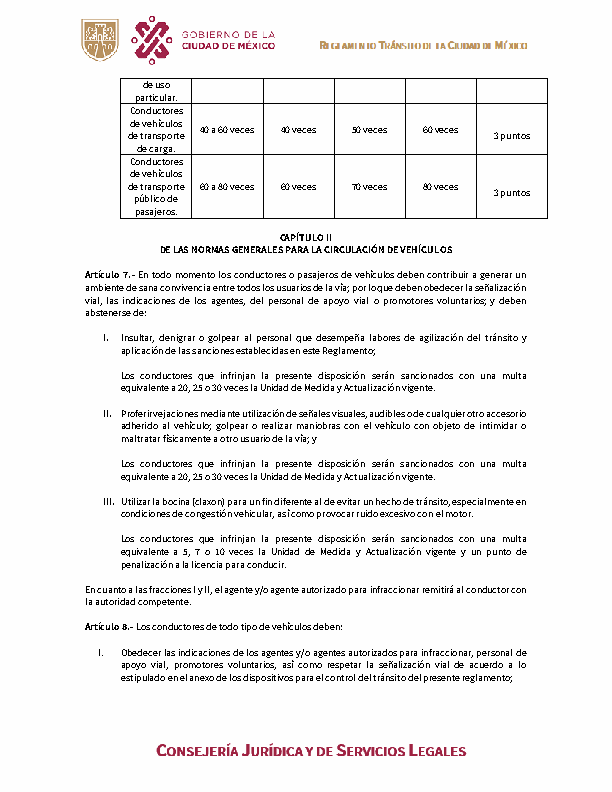

In [20]:
beta[11][2]

In [21]:
print(" \n \n".join(alpha[10].split(" \n \n")[2:]))

CAPÍTULO II 
DE LAS NORMAS GENERALES PARA LA CIRCULACIÓN DE VEHÍCULOS 
 
Artículo 7.- En todo momento los conductores o pasajeros de vehículos deben contribuir a generar un 
ambiente de sana convivencia entre todos los usuarios de la vía; por lo que deben obedecer la señalización 
vial, las indicaciones de los agentes, del personal de apoyo vial o promotores voluntarios; y deben 
abstenerse de: 
 
I.  Insultar, denigrar o golpear al personal que desempeña labores de agilización del tránsito y 
aplicación de las sanciones establecidas en este Reglamento; 
 
Los  conductores  que  infrinjan  la  presente  disposición  serán  sancionados  con  una  multa 
equivalente a 20, 25 o 30 veces la Unidad de Medida y Actualización vigente. 
 
II.  Proferir vejaciones mediante utilización de señales visuales, audibles o de cualquier otro accesorio 
adherido al vehículo; golpear o realizar maniobras con el vehículo con objeto de intimidar o 
maltratar físicamente a otro usuario de la vía; y 
 
Los  

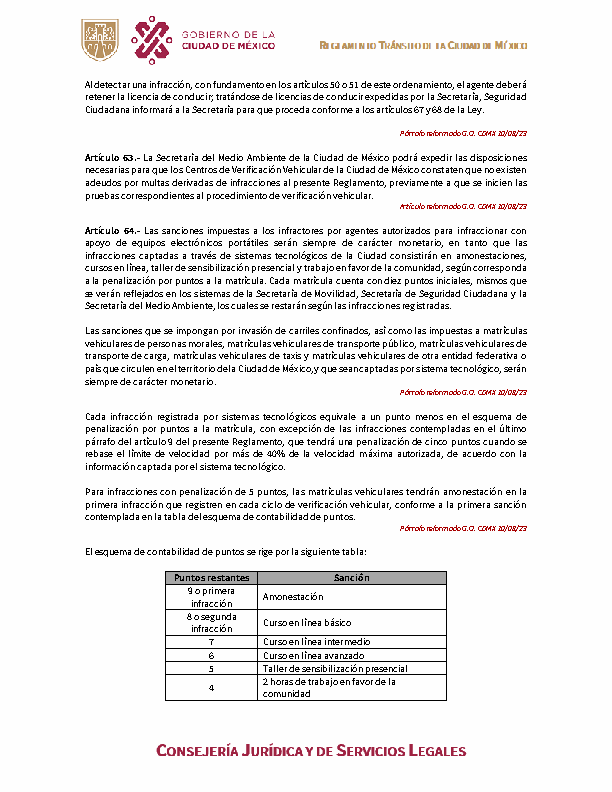

In [22]:
beta[67][2]

In [23]:
print(" \n \n".join(alpha[66].split(" \n \n")[:-2]))

 
Al detectar una infracción, con fundamento en los artículos 50 o 51 de este ordenamiento, el agente deberá 
retener la licencia de conducir; tratándose de licencias de conducir expedidas por la Secretaría, Seguridad 
Ciudadana informará a la Secretaría para que proceda conforme a los artículos 67 y 68 de la Ley. 
 
Párrafo reformado G.O. CDMX 10/08/23 
 
Artículo 63.- La Secretaría del Medio Ambiente de la Ciudad de México podrá expedir las disposiciones 
necesarias para que los Centros de Verificación Vehicular de la Ciudad de México constaten que no existen 
adeudos por multas derivadas de infracciones al presente Reglamento, previamente a que se inicien las 
pruebas correspondientes al procedimiento de verificación vehicular. 
Artículo reformado G.O. CDMX 10/08/23 
 
Artículo 64.- Las sanciones impuestas a los infractores por agentes autorizados para infraccionar con 
apoyo  de  equipos  electrónicos  portátiles  serán  siempre  de  carácter  monetario,  en  tanto  que  las 
infra

In [24]:
print(parrafo(alpha[66],-2,df_34))

 
Al detectar una infracción, con fundamento en los artículos 50 o 51 de este ordenamiento, el agente deberá 
retener la licencia de conducir; tratándose de licencias de conducir expedidas por la Secretaría, Seguridad 
Ciudadana informará a la Secretaría para que proceda conforme a los artículos 67 y 68 de la Ley. 
 
Párrafo reformado G.O. CDMX 10/08/23 
 
Artículo 63.- La Secretaría del Medio Ambiente de la Ciudad de México podrá expedir las disposiciones 
necesarias para que los Centros de Verificación Vehicular de la Ciudad de México constaten que no existen 
adeudos por multas derivadas de infracciones al presente Reglamento, previamente a que se inicien las 
pruebas correspondientes al procedimiento de verificación vehicular. 
Artículo reformado G.O. CDMX 10/08/23 
 
Artículo 64.- Las sanciones impuestas a los infractores por agentes autorizados para infraccionar con 
apoyo  de  equipos  electrónicos  portátiles  serán  siempre  de  carácter  monetario,  en  tanto  que  las 
infra

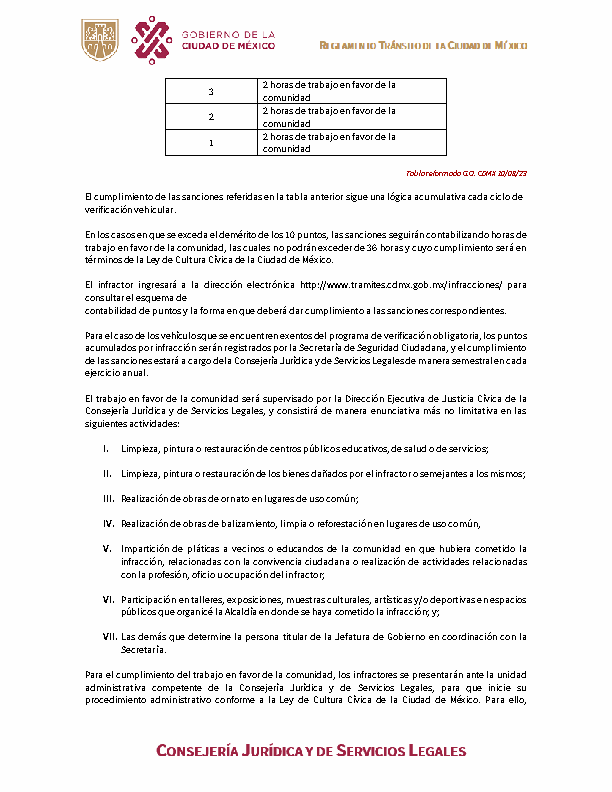

In [25]:
beta[68][2]

In [26]:
print(" \n \n".join(alpha[67].split(" \n \n")[2:]))

El cumplimiento de las sanciones referidas en la tabla anterior sigue una lógica acumulativa cada ciclo de 
verificación vehicular. 
 
En los casos en que se exceda el demérito de los 10 puntos, las sanciones seguirán contabilizando horas de 
trabajo en favor de la comunidad, las cuales no podrán exceder de 36 horas y cuyo cumplimiento será en 
términos de la Ley de Cultura Cívica de la Ciudad de México.  
  
El infractor ingresará a la dirección electrónica http://www.tramites.cdmx.gob.mx/infracciones/ para 
consultar el esquema de 
contabilidad de puntos y la forma en que deberá dar cumplimiento a las sanciones correspondientes.  
 
Para el caso de los vehículos que se encuentren exentos del programa de verificación obligatoria, los puntos 
acumulados por infracción serán registrados por la Secretaría de Seguridad Ciudadana, y el cumplimiento 
de las sanciones estará a cargo de la Consejería Jurídica y de Servicios Legales de manera semestral en cada 
ejercicio anual. 
 
El trabajo e

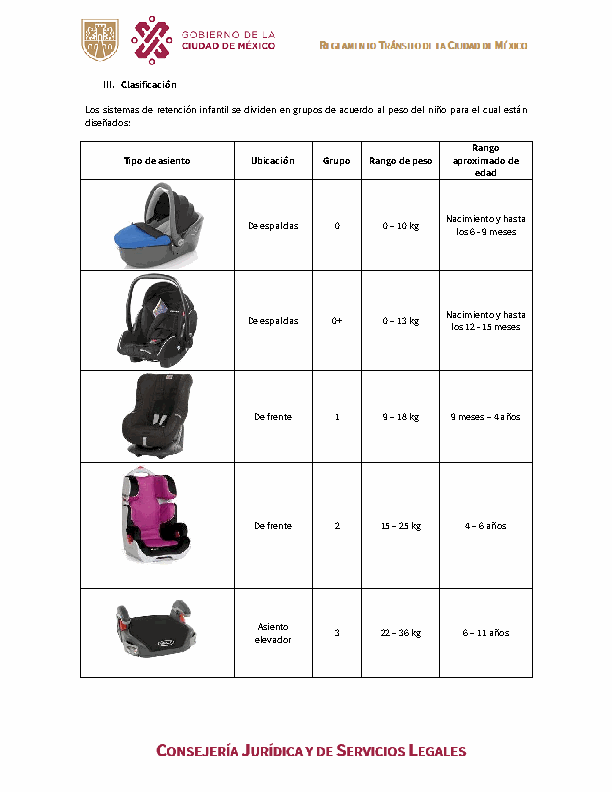

In [27]:
beta[132][2]

In [28]:
print(parrafo(alpha[131],-7,df_5))

 
III.  Clasificación 
 
Los sistemas de retención infantil se dividen en grupos de acuerdo al peso del niño para el cual están 
diseñados: 
 
  Tipo de asiento         Ubicación Grupo Rango de peso              Rango aproximado de edad
0                       De espaldas     0     0 – 10 kg    Nacimiento y hasta los 6 - 9 meses
1                       De espaldas    0+     0 – 13 kg  Nacimiento y hasta los 12 - 15 meses
2                         De frente     1     9 – 18 kg                      9 meses – 4 años
3                         De frente     2    15 – 25 kg                            4 – 6 años
4                  Asiento elevador     3    22 – 36 kg                           6 – 11 años


In [29]:
alpha[9] = parrafo(alpha[9],-2,df_12)
alpha[10] = " \n \n".join(alpha[10].split(" \n \n")[2:])
alpha[66] = parrafo(alpha[66],-2,df_34)
alpha[67] = " \n \n".join(alpha[67].split(" \n \n")[2:])
alpha[131] = parrafo(alpha[131],-7,df_5)

In [30]:
print(alpha[131])

 
III.  Clasificación 
 
Los sistemas de retención infantil se dividen en grupos de acuerdo al peso del niño para el cual están 
diseñados: 
 
  Tipo de asiento         Ubicación Grupo Rango de peso              Rango aproximado de edad
0                       De espaldas     0     0 – 10 kg    Nacimiento y hasta los 6 - 9 meses
1                       De espaldas    0+     0 – 13 kg  Nacimiento y hasta los 12 - 15 meses
2                         De frente     1     9 – 18 kg                      9 meses – 4 años
3                         De frente     2    15 – 25 kg                            4 – 6 años
4                  Asiento elevador     3    22 – 36 kg                           6 – 11 años


In [31]:
print(alpha[74])

 
Dado en la Residencia Oficial de la Jefa de Gobierno de la Ciudad de México, a los 22 días del mes de abril 
de 2019.- LA JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO, CLAUDIA SHEINBAUM PARDO. - FIRMA. - EL 
SECRETARIO DE MOVILIDAD, ANDRÉS LAJOUS LOAEZA. - FIRMA. 
 
 
TRANSITORIOS DE LA FE DE ERRATAS DEL DECRETO POR EL QUE SE REFORMAN Y DEROGAN DIVERSAS 
DISPOSICIONES DEL REGLAMENTO DE TRÁNSITO DE LA CIUDAD DE MÉXICO, PUBLICADO EN EL 
NÚMERO 73 DE LA GACETA OFICIAL DE LA CIUDAD DE MÉXICO, DE FECHA 16 DE ABRIL DE 2019, 
PUBLICADO EN LA GACETA OFICIAL DE LA CIUDAD DE MÉXICO EL 23 DE ABRIL DE 2019. 
 
Único. - Publíquese en la Gaceta Oficial de la Ciudad de México. 
 
 
TRANSITORIOS DEL DECRETO POR EL QUE SE REFORMAN Y DEROGAN DIVERSAS DISPOSICIONES DEL 
REGLAMENTO DE TRÁNSITO DEL DISTRITO FEDERAL PUBLICADO EN LA GACETA OFICIAL DE LA CIUDAD 
DE MÉXICO, EL DÍA 11 DE FEBRERO DE 2020. 
 
PRIMERO. - Publíquese en la Gaceta Oficial de la Ciudad de México.  
 
SEGUNDO. - El presente decreto entrar

In [36]:
# hasta la 74 (75 documento)
sample = alpha[:74]

In [38]:
prueba = " \n \n".join(sample)
prueba_2 = prueba.split("TÍTULO")
print(len(prueba_2))

prueba_2[1].split("Artículo")

7


[' PRIMERO \nDISPOSICIONES GENERALES \n \nCAPÍTULO I \nDEL OBJETO Y CONCEPTOS GENERALES \n \n',
 ' 1.- El presente reglamento tiene por objeto regular la circulación de peatones y vehículos en la vía \npública y la seguridad vial en la Ciudad de México.  \n \nLas disposiciones de este reglamento son aplicables a peatones, ciclistas, conductores, pasajeros y \npropietarios de cualquier tipo de vehículo matriculado en el país o el extranjero y que circule en el territorio \nde la Ciudad de México. En el presente ordenamiento se establecen las normas respecto a sus movimientos \ny estacionamiento, en observancia a lo establecido en las leyes, reglamentos, acuerdos, decretos y \nnormatividad local vigente, así como las maniobras de ascenso y descenso de pasajeros o de carga y \ndescarga. De igual forma, determina las condiciones legales y de seguridad a las que se deben ajustar los \nvehículos y sus conductores para su circulación, y establece los esquemas de sanciones por la comisión de \

In [77]:

b = []
for i,celda in enumerate(prueba_2):
    for articulo in celda.split("Artículo"):
        a = {}
        a["Título"] = f"Título {i}"
        a["Artículo"] = "Artículo"+articulo
        a["Artículo"] = a["Artículo"].replace("\n \n \n \n  \n \n \n"," \n \n")
        a["Artículo"] = a["Artículo"].replace("\n \n \n  \n \n \n"," \n")
        
        b.append(a)

c = b[2::]

#quitar c[4]
#quitar c[29]
#quitar c[38]
#quitar c[46]
#quitar c[66] c[67] c[70]

# del c[6] quitar la parte final 
# del c[13] quitar la parte final
# del c[19] quitar la parte final
# del c[21] quitar la parte final
# del c[24] quitar la parte final
# del c[34] quitar la parte final
# del c[41] quitar la parte final
# para el c[44] falta juntarlo con lo demas c[45]
# del c[53] quitar la parte final
# del c[56] quitar la parte final
# del c[62] quitar la parte final
# para el c[60] falta juntarlo con lo demas c[61]
# para el c[64] falta juntarlo con lo demas c[65]
# pegar c[69*]con c[70]
# del c[75] quitar la parte final
# pegar c[76]con c[77]
# c[78] incluye los transitorios

In [78]:
lista_quitar = [c[4],c[29],c[38],c[46],c[66],c[67],c[70]]
lista_quitar

[{'Título': 'Título 2',
  'Artículo': 'Artículo SEGUNDO \nDE LAS NORMAS DE CIRCULACIÓN \n \nCAPÍTULO I \nDE LA CIRCULACIÓN DE PEATONES \n \n'},
 {'Título': 'Título 3',
  'Artículo': 'Artículo TERCERO \nDEL USO DE LA VÍA PÚBLICA \n \nCAPÍTULO I \nDEL ESTACIONAMIENTO \n \n'},
 {'Título': 'Título 4',
  'Artículo': 'Artículo CUARTO \nDE LAS NORMAS DE SEGURIDAD PARA LA CONDUCCIÓN DE VEHÍCULOS \n \nCAPÍTULO I \nDE LAS DISPOSICIONES DE SEGURIDAD \n \n'},
 {'Título': 'Título 5',
  'Artículo': 'Artículo QUINTO  \nDE LA REGULACIÓN, INSPECCIÓN Y VIGILANCIA \n \nCAPITULO I \nDE LOS REQUISITOS LEGALES PARA LA CONDUCCIÓN DE VEHÍCULOS \n \n'},
 {'Título': 'Título 5', 'Artículo': 'Artículo 61.- DEROGADO \n \n'},
 {'Título': 'Título 6',
  'Artículo': 'Artículo SEXTO \nDE LAS SANCIONES LEGALES Y MEDIOS DE IMPUGNACIÓN \n \nCAPÍTULO I \nDE LAS SANCIONES \n \n'},
 {'Título': 'Título 6',
  'Artículo': 'Artículo reformado G.O. CDMX 10/08/23 \n \n'}]

In [79]:
f = [x for x in c if x not in lista_quitar]

In [144]:
print(f[70]['Artículo'])

Artículos 103 y 
107 de la Constitución Política de los Estados Unidos Mexicanos. 
 
Tratándose de infracciones en materia de tránsito que atenten contra la seguridad vial de las personas, 
que sean captadas por los sistemas tecnológicos de la Ciudad de México, el infractor podrá interponer el 
recurso de revisión vía electrónica a la Consejería Jurídica y de Servicios Legales de la Ciudad de México, 
a través de la dirección electrónica, en los términos y formas establecidos en la Ley de Cultura Cívica de 
la Ciudad de México. 
 



In [143]:
len(f)

72

In [53]:
print(f[1]['Artículo'].replace("\n \n \n \n  \n \n \n"," \n \n"))

Artículo 2.- La aplicación de este reglamento estará basada en los siguientes principios rectores:  
 
I.  La circulación en condiciones de seguridad vial es un derecho, por lo que todas las autoridades en 
el ámbito de su competencia deben adoptar medidas para garantizar la protección de la vida e 
integridad física de las personas, sobre todo de los usuarios vulnerables de la vía; 
 
II.  La circulación en la vía pública debe efectuarse con cortesía, por lo que los ciudadanos deben 
observar un trato respetuoso hacia el resto de los usuarios de la vía, así como a los agentes y 
personal de apoyo vial;  
 
III.  Se evitará la colocación de objetos que representen un obstáculo a la circulación de vehículos y 
tránsito de peatones; 
 
IV.  Se dará prioridad en la utilización del espacio vial de acuerdo a la siguiente jerarquía 
 
a)  Peatones; en especial personas con discapacidad y movilidad limitada 
b)  Ciclistas; 
c)  Usuarios del servicio de transporte público de pasajeros; 
d)  Pr

In [60]:
for elemento in f:
    elemento['Artículo'] = elemento['Artículo'].replace("\n \n \n \n  \n \n \n"," \n \n")

In [63]:
print(f[3]['Artículo'])

Artículo 4.- Además de lo que señala la Ley y sus reglamentos, para los efectos de este Reglamento, se 
entiende por: 
 
I.  Agente, persona integrante de la Policía de Control de Tránsito; 
 
I Bis.    Agente autorizado para infraccionar, persona integrante de la Policía de Control de Tránsito, 
autorizada  para  expedir  y firmar  las  boletas  de  sanción,  con  motivo  de  infracciones  a  las 
disposiciones  en  materia  de  tránsito,  captadas  mediante  sistemas  tecnológicos  y  equipos 
electrónicos portátiles;  
 
II.  Amonestación, acto por el cual el agente advierte a los peatones, conductores y pasajeros de un 
vehículo sobre el incumplimiento cometido a las disposiciones de este reglamento y tiene como 
propósito orientarlos a conducirse de conformidad con lo establecido en el mismo y prevenir la 
realización de otras conductas similares, puede realizarse de manera verbal o por escrito, mismo 
que será notificado en el domicilio del infractor que se encuentre registrado e

In [145]:
import json 

json_data = json.dumps(f,ensure_ascii=False,indent=2)

In [147]:
with open('documents.json', 'wt') as f_out:
    json.dump(f, f_out, indent=2, ensure_ascii=False)

In [148]:
!head documents.json

[
  {
    "Título": "Título 1",
    "Artículo": "Artículo 1.- El presente reglamento tiene por objeto regular la circulación de peatones y vehículos en la vía \npública y la seguridad vial en la Ciudad de México.  \n \nLas disposiciones de este reglamento son aplicables a peatones, ciclistas, conductores, pasajeros y \npropietarios de cualquier tipo de vehículo matriculado en el país o el extranjero y que circule en el territorio \nde la Ciudad de México. En el presente ordenamiento se establecen las normas respecto a sus movimientos \ny estacionamiento, en observancia a lo establecido en las leyes, reglamentos, acuerdos, decretos y \nnormatividad local vigente, así como las maniobras de ascenso y descenso de pasajeros o de carga y \ndescarga. De igual forma, determina las condiciones legales y de seguridad a las que se deben ajustar los \nvehículos y sus conductores para su circulación, y establece los esquemas de sanciones por la comisión de \ninfracciones a los preceptos contenidos 

In [150]:
import json

with open('documents.json', 'rt') as f_in:
    docs_raw = json.load(f_in)

In [151]:
docs_raw

[{'Título': 'Título 1',
  'Artículo': 'Artículo 1.- El presente reglamento tiene por objeto regular la circulación de peatones y vehículos en la vía \npública y la seguridad vial en la Ciudad de México.  \n \nLas disposiciones de este reglamento son aplicables a peatones, ciclistas, conductores, pasajeros y \npropietarios de cualquier tipo de vehículo matriculado en el país o el extranjero y que circule en el territorio \nde la Ciudad de México. En el presente ordenamiento se establecen las normas respecto a sus movimientos \ny estacionamiento, en observancia a lo establecido en las leyes, reglamentos, acuerdos, decretos y \nnormatividad local vigente, así como las maniobras de ascenso y descenso de pasajeros o de carga y \ndescarga. De igual forma, determina las condiciones legales y de seguridad a las que se deben ajustar los \nvehículos y sus conductores para su circulación, y establece los esquemas de sanciones por la comisión de \ninfracciones a los preceptos contenidos en el pres